In [1]:
from pymopt.voxel import VoxelDicomModel


In [2]:
dcm = VoxelDicomModel(nPh=10**7)


In [3]:
path = 'D:/DICOMfile9'
dcm.import_dicom(path)

ConstPixelDims: (1024, 1024, 1095)
ConstPixelSpacing: (0.0274828696451, 0.0274828696451, 0.0274828696451)
Data infomation
(0008, 0005) Specific Character Set              CS: ['', 'ISO 2022 IR 87']
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL']
(0008, 0016) SOP Class UID                       UI: CT Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.392.200036.9110..1.1.201701271710060237
(0008, 0020) Study Date                          DA: '20170127'
(0008, 0021) Series Date                         DA: '20170127'
(0008, 0022) Acquisition Date                    DA: '20170127'
(0008, 0023) Content Date                        DA: '20170127'
(0008, 0030) Study Time                          TM: '165759.0000'
(0008, 0031) Series Time                         TM: '165759.0000'
(0008, 0032) Acquisition Time                    TM: '165759.0000'
(0008, 0033) Content Time                        TM: '171006.0237'
(0008, 0050) Accession Nu

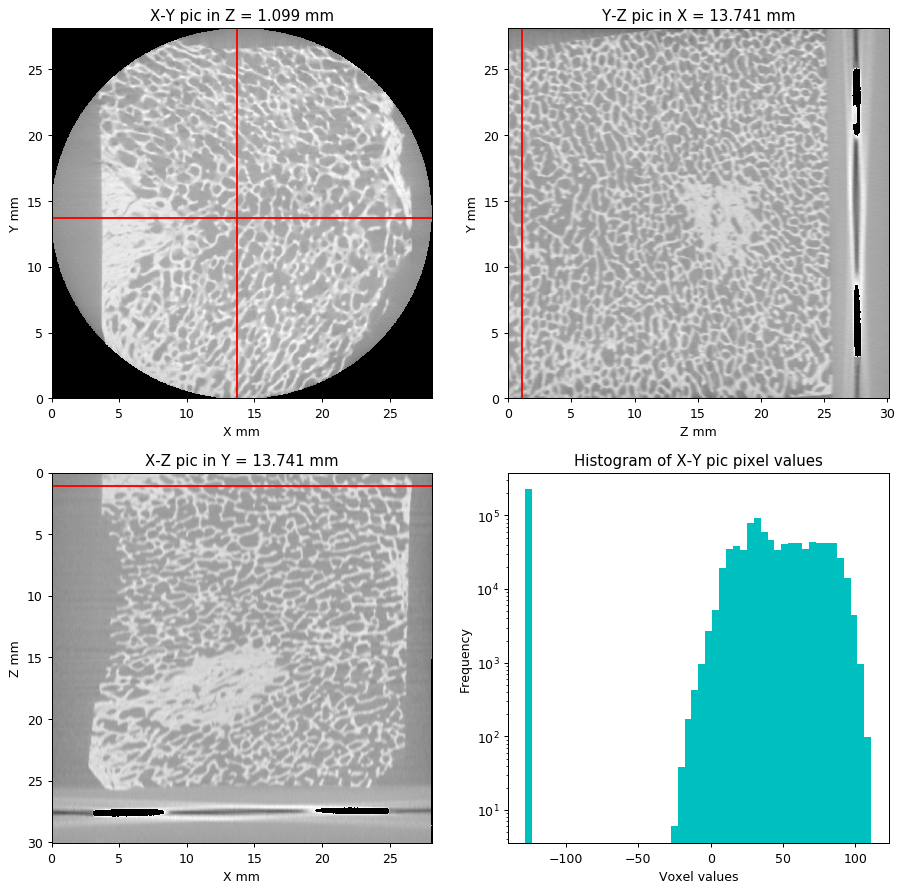

In [4]:
dcm.display_cross_section(xx = 500,yy = 500,zz = 40,cmap = 'gray')

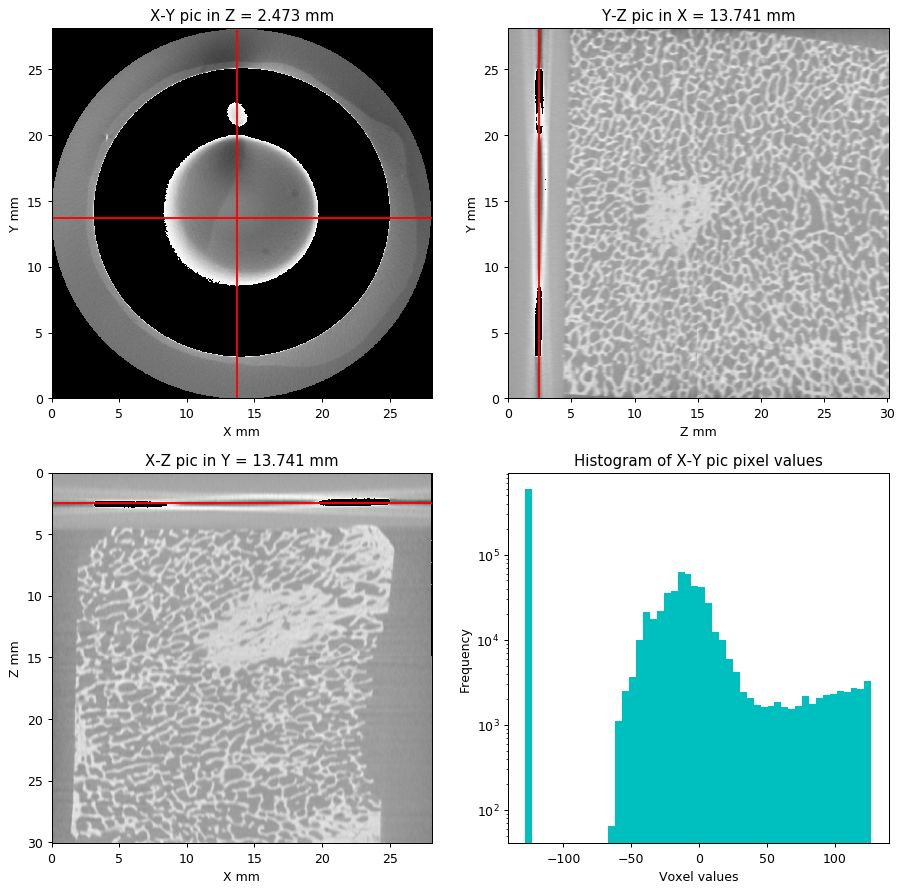

In [5]:
dcm.rot180_y()
dcm.display_cross_section(xx = 500,yy = 500,zz = 90,graph_type = 'ALL',cmap = 'gray')
#dcm.set_threshold()

Trimming parameters
               right   left upper lower    top bottom
Pixel number     109     72     0     0    178      0
Position [mm]  2.996  1.979     0     0  4.892      0


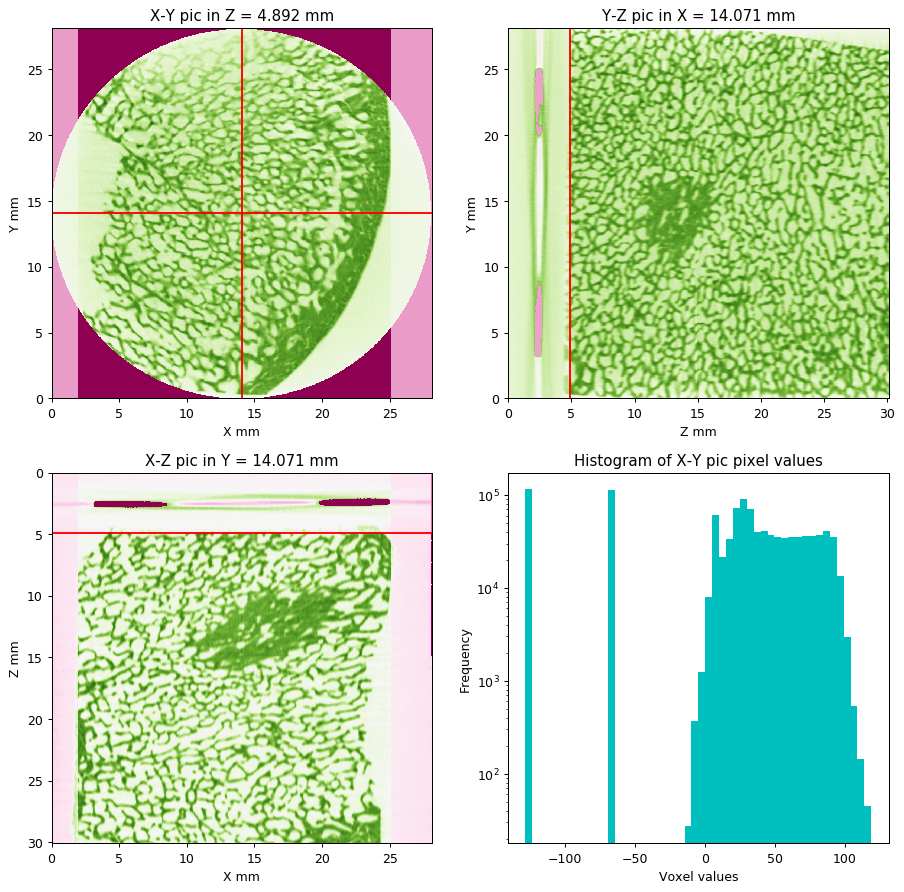

In [6]:
trim_params = {
    'int_pix':False,
    'right': 3,
    'left': 2,
    'upper': 0,
    'lower':0,
    'top':4.9,
    'bottom':0,
    'cmap':'PiYG',
}
dcm.trim_area(**trim_params)

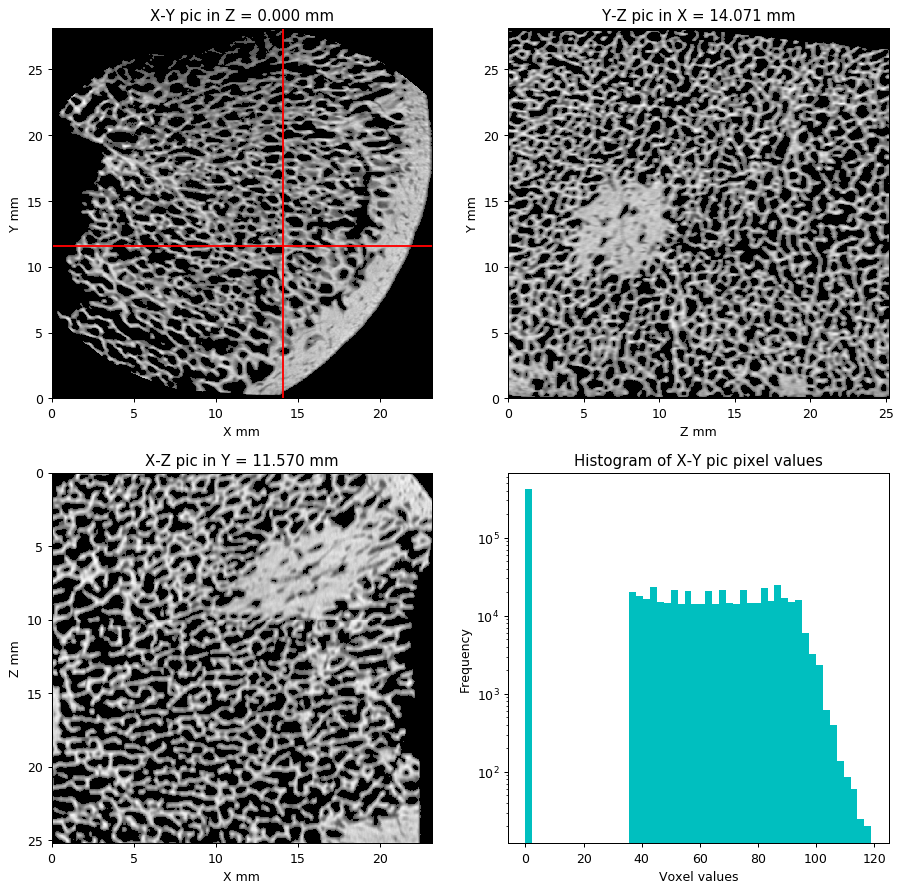

#########  Size  #########
* Image shape was changed
  from (1024,1024,1095)
  to   (1024,843,917)

* Memory area size for
  voxel storage was changed
  from 1148.191 Mbyte
  to   791.584 Mbyte


In [7]:
dcm.set_trim(cmap = 'gray')

In [ ]:
#　設計ではこの後メモリーがｇｃされるはずだが、減らない？

In [8]:
params = {
    'th_skin':2,'th_ct':0.03,
    'n_sp':1.,'n_tr':1.37,'n_ct':1.37,'n_skin':1.37,'n_air':1.,
    'ma_sp':0.00001,'ma_tr':0.011,'ma_ct':0.011,'ma_skin':0.037,
    'ms_sp':0.00001,'ms_tr':19.1,'ms_ct':19.1,'ms_skin':18.8,
    'g_sp':0.99,'g_tr':0.93,'g_ct':0.93,'g_skin':.93,
    }
dcm.build(params)

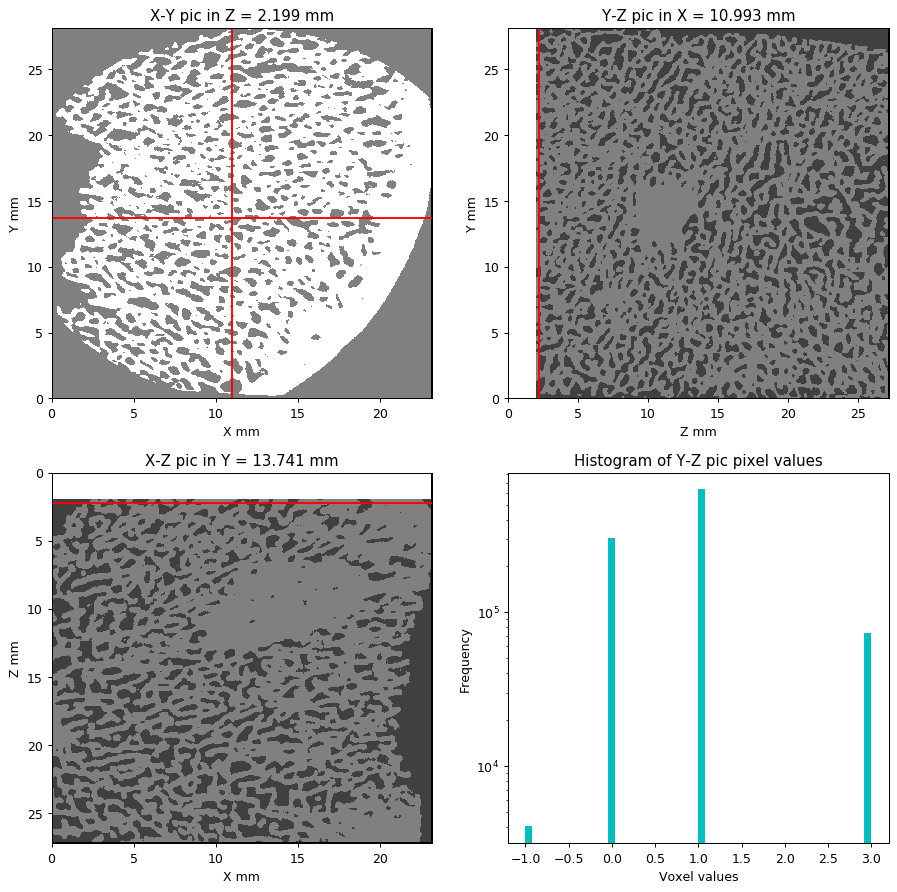

In [11]:
dcm.display_cross_section(image = dcm.model.voxel_model,
                          xx = 400,yy = 500,zz = 80,
                          cmap = 'gray',hist_type = 'YZ')

In [ ]:
dcm.set_monte_params(nPh = 10**7)

In [12]:
dcm.start()


###### Start ######

Progress: 0.14 [％]
Calculation time: 0 minutes 38.296 seconds.

Progress: 0.46 [％]
Calculation time: 1 minutes 31.926 seconds.

Progress: 1.25 [％]
Calculation time: 3 minutes 25.860 seconds.

Progress: 3.364 [％]
Calculation time: 7 minutes 23.216 seconds.

Progress: 8.681 [％]
Calculation time: 15 minutes 5.476 seconds.

Progress: 18.182 [％]
Calculation time: 29 minutes 38.742 seconds.

Progress: 30.33 [％]
Calculation time: 56 minutes 58.089 seconds.

Progress: 44.77 [％]
Calculation time: 1 h 44.000 minutes.

Progress: 59.702 [％]
Calculation time: 2 h 58.000 minutes.

Progress: 73.716 [％]
Calculation time: 4 h 45.000 minutes.

Progress: 86.179 [％]
Calculation time: 6 h 59.000 minutes.

Progress: 95.226 [％]
Calculation time: 9 h 4.000 minutes.

Progress: 99.352 [％]
Calculation time: 10 h 18.000 minutes.

Progress: 99.999 [％]
Calculation time: 10 h 50.000 minutes.


###### Finish ######
Maximum step number: 19850
######
Mean Rd 0.514836
Mean Tt 0.016124

Calculation 

In [13]:
res = dcm.getResult()

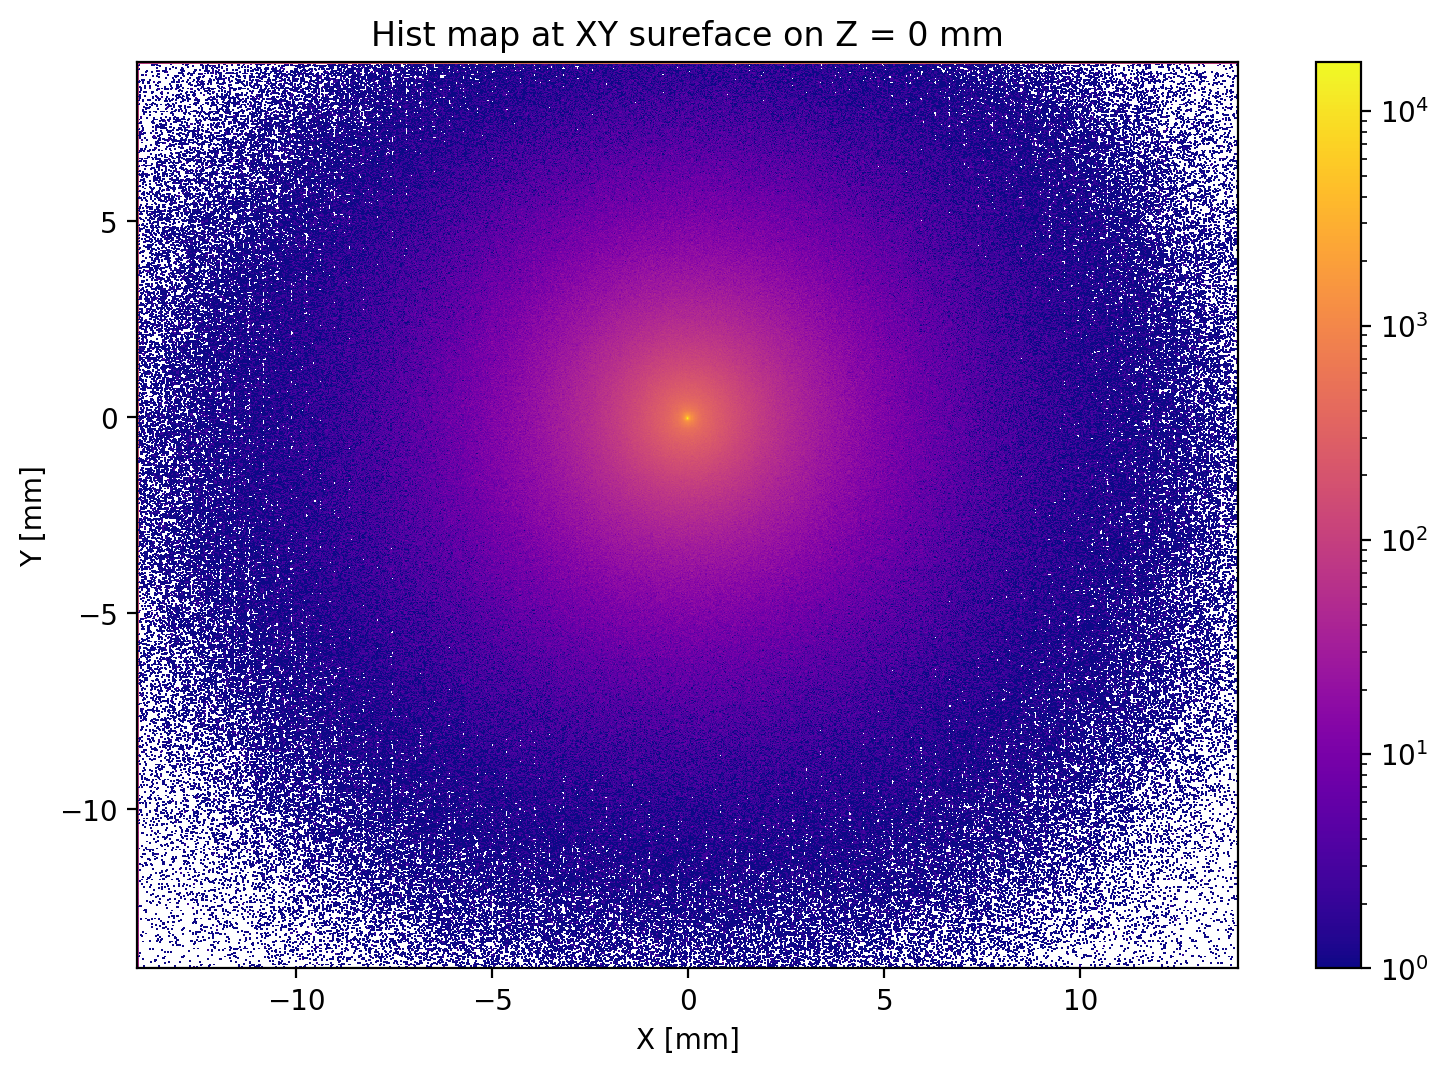

In [14]:

dcm.display_histmap()

In [79]:
import pickle
import bz2
def saveFile(res,fname = "test"):
    def calTime(end, start):
        elapsed_time = end - start
        q, mod = divmod(elapsed_time, 60)
        if q < 60:
            print('Calculation time: %d minutes %0.3f seconds.' % (q, mod))
        else:
            q2, mod2 = divmod(q, 60)
            print('Calculation time: %d h %0.3f minutes.' % (q2, mod2))
    start_ = time.time()
    with bz2.open(fname+".pkl.bz2", 'wb') as fp:
        fp.write(pickle.dumps(res))
    calTime(time.time(), start_)
saveFile(res,fname = "../dicom9")

Calculation time: 2 minutes 32.446 seconds.


In [77]:
start_ = time.time()
with bz2.open("../dicom9.pkl.bz2", 'rb') as fp: 
    data = pickle.loads(fp.read())
calTime(time.time(), start_)

Calculation time: 0 minutes 14.421 seconds.


In [78]:
data

{'p': array([[-3.96082038e-03,  5.21204760e-03, -1.71981028e-05, ...,
          1.54815400e+00,  1.40300045e+01, -5.10411072e+00],
        [ 3.07084643e-03, -1.10586046e-03, -3.25214816e-04, ...,
          9.05560589e+00, -5.05122042e+00,  9.05560589e+00],
        [-0.00000000e+00, -0.00000000e+00, -0.00000000e+00, ...,
          1.62564812e+01,  1.84103127e+01,  5.50972509e+00]], dtype=float32),
 'v': array([[-0.17939807,  0.28964645, -0.01880486, ..., -0.5936562 ,
          0.97822344, -0.05526607],
        [ 0.13908835, -0.06145542, -0.35559845, ...,  0.8034435 ,
         -0.14209321,  0.93844616],
        [-0.97389466, -0.9551587 , -0.9344497 , ..., -0.0452881 ,
         -0.15128931, -0.3409757 ]], dtype=float32),
 'w': array([9.7371078e-01, 9.7371078e-01, 9.7371078e-01, ..., 1.4131726e-04,
        1.2761509e-04, 1.1408322e-04], dtype=float32)}

In [16]:
index = dcm.getRdTtIndex()

In [17]:
def radialDistance(p,w,nn,dr):
    alpha = np.array([(i)*dr for i in range(nn+1)])
    da = np.array([2*np.pi*(i+0.5)*dr**2 for i in range(nn)])
    r = np.sqrt(p[0]**2+p[1]**2)
    Rdr = []
    for i in range(nn):
        index = np.where((alpha[i]<r)&(alpha[i+1]>=r))[0]
        Rdr.append(w[index].sum())
    Rdr = np.array(Rdr)/(da*nPh)
    return alpha[:-1],Rdr

def AngularyResolved(v,w,nn):
    da = np.pi/(2*nn)
    alpha = np.array([(i+0.5)*da for i in range(nn+1)])
    alpha2 = np.array([(i)*da for i in range(nn+1)])
    do = 4*np.pi*np.sin(alpha)*np.sin(da/2)
    at = np.arccos(np.sign(v[2])*(v[2]))
    Rda = []
    for i in range(nn):
        index = np.where((alpha2[i]<at)&(alpha2[i+1]>=at))[0]
        Rda.append(w[index].sum())
    Rda = np.array(Rda)/(do[:-1]*nPh)
    return alpha[:-1],Rda

In [27]:
nn = 100
dr = 0.1
nPh = 10**7
p_result = res["p"]
v_result = res["v"]
w_result = res["w"]
Tt_indexA = index['Tt']

Rd_indexA = index['Rd']
alpha,Rdr = radialDistance(p_result[:,Rd_index],w_result[Rd_index],nn,dr)

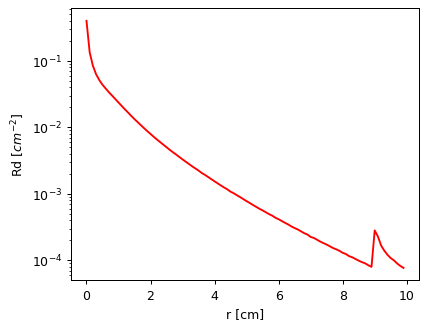

In [29]:


plt.figure(figsize=(5,4),dpi=90)
plt.plot(alpha,Rdr,'-',c = 'red')
plt.yscale('log')
#plt.xlim(0,1)
#plt.legend()
plt.xlabel('r [cm]')
plt.ylabel('Rd $[cm^{-2}]$')
plt.show()

In [ ]:
res['p'][]

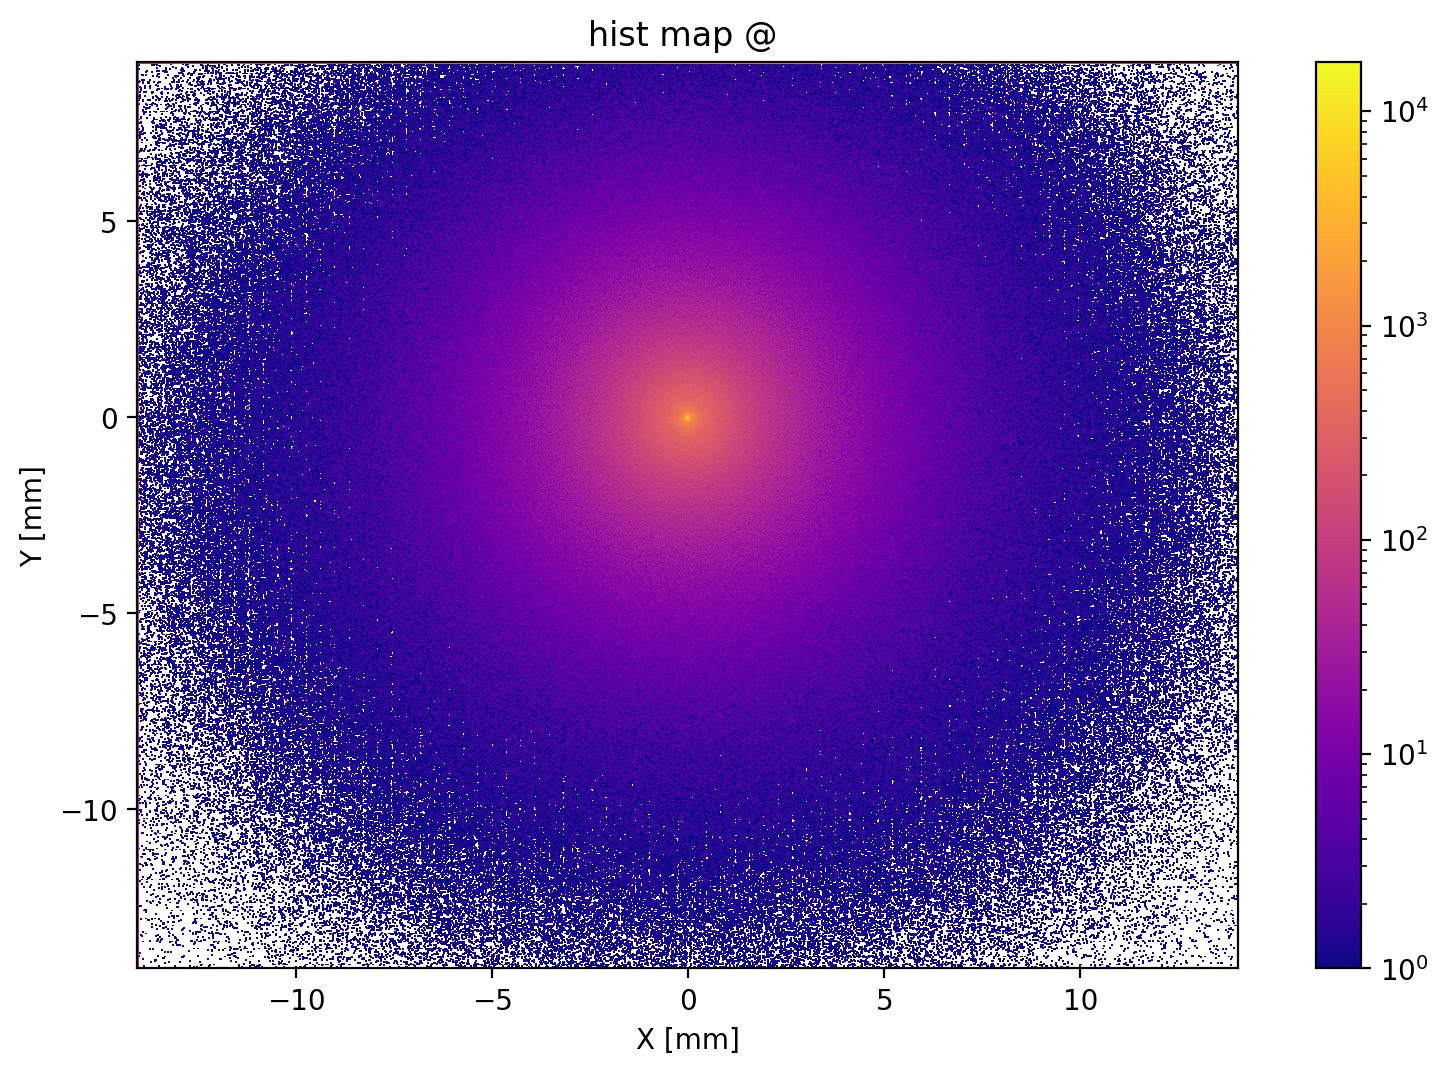

In [15]:
from matplotlib import colors
import matplotlib.pyplot as plt
import numpy as np
res = dcm.getResult()
fig = plt.figure(figsize=(10,6),dpi=200)
ax = fig.add_subplot(111)
ax.set_aspect('equal')
Rd_index = np.where(res['v'][2]<0)[0]
y = res['p'][1,Rd_index]
x = res['p'][0,Rd_index]
H = ax.hist2d(x,y, bins=2**10,cmap="plasma",norm=colors.LogNorm())
ax.set_title('hist map @ ')
ax.set_xlabel('X [mm]')
ax.set_ylabel('Y [mm]')
fig.colorbar(H[3],ax=ax)
plt.show()

In [ ]:
dcm.model.get_params()